# Введение в регрессионный анализ

## Практикум 2. Повторение: описание данных, доверительные интервалы и проверка гипотез

*Алла Тамбовцева*

Загрузим библиотеки и модули, необходимые для работы:

* `numpy` для некоторых арифметических функций;
* `pandas` для загрузки и обработки данных;
* модуль `stats` из библиотеки `scipy` для построения доверительных интервалов и проверки гипотез.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st

### Часть 1: описательные статистики

В этом практикуме мы будем работать с данными по ценам на квартиры в Москве из файла `flats.csv`. Загрузим данные из этого файла и сохраним их в датафрейм `df`:

In [2]:
df = pd.read_csv("flats.csv")

**Примечание для Jupyter Notebook.** Удобно, если файл с данными при работе лежит в той же папке, что и текущий ipynb-файл, в котором мы запускаем код, так не придется полностью прописывать к нему путь, достаточно одного названия с расширением.

**Примечание для Google Colab.** Загрузить файл с данными в облачное хранилище можно через кнопку *Files* (значок папки слева от рабочей области с ячейками), при нажатии на которую появляется возможность выбрать файл с компьютера (значок стрелки). После добавления файла его можно выбрать, кликнуть на три точки справа от названия, скопировать путь через *Copy path* и вставить его в функцию `read_csv()`. Например:

    df = pd.read_csv("/content/flats.csv") 

Посмотрим на датафрейм:

In [3]:
df

,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor
0,730,134,102,10.0,9.0,10,1,1,1
1,477,119,93,15.0,9.0,1,1,0,1
2,350,80,44,14.0,10.5,10,1,1,0
3,410,102,75,10.0,6.5,5,1,1,1
4,50,63,47,7.0,12.0,20,0,1,0
...,...,...,...,...,...,...,...,...,...
2035,117,76,43,10.0,12.0,5,1,0,1
2036,91,60,44,6.0,14.5,7,1,0,1
2037,94,65,40,8.0,14.5,15,1,0,1
2038,110,74,44,10.0,13.0,7,1,0,1


Переменные в файле: 

* `price`: цена квартиры, в тысячах долларов;
* `totsp`: общая площадь, в кв.метрах;
* `livesp`: жилая площадь, в кв.метрах;
* `kitsp`: площадь кухни, в кв.метрах;
* `dist`: расстояние до центра города, в км;
* `metrdist`: расстояние до метро, в мин;
* `walk`: шаговая доступность до метро, 0 или 1;
* `brick`: дом из кирпича или аналогичного «капитального» материала, 0 или 1; • floor: удобный ли этаж (не первый и последний), 0 или 1.

Посмотрим на переменные и проверим, что все переменные корректных типов (например, числа считаны как числа, а не как текст):

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2040 entries, 0 to 2039
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     2040 non-null   int64  
 1   totsp     2040 non-null   int64  
 2   livesp    2040 non-null   int64  
 3   kitsp     2040 non-null   float64
 4   dist      2040 non-null   float64
 5   metrdist  2040 non-null   int64  
 6   walk      2040 non-null   int64  
 7   brick     2040 non-null   int64  
 8   floor     2040 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 143.6 KB


Примечание: тип `int` — целочисленный (*integer*), тип `float` — вещественный, может включать в себя как дробные, так и целочисленные значения.

Посмотрим на описательные статистики по всем столбцам:

In [5]:
df.describe()

,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor
count,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000
mean,127.496569,73.084314,46.337255,8.898529,11.015686,8.117157,0.685784,0.323039,0.790686
std,51.878220,15.123450,7.894348,2.787073,3.375539,3.815574,0.464317,0.467752,0.406918
min,50.000000,44.000000,28.000000,5.000000,3.000000,1.000000,0.000000,0.000000,0.000000
25%,95.000000,62.000000,42.000000,7.000000,9.000000,5.000000,0.000000,0.000000,1.000000
50%,115.000000,73.500000,45.000000,9.000000,12.000000,7.000000,1.000000,0.000000,1.000000
75%,142.000000,79.000000,50.000000,10.000000,13.500000,10.000000,1.000000,1.000000,1.000000
max,730.000000,192.000000,102.000000,25.000000,17.000000,20.000000,1.000000,1.000000,1.000000


Теперь обратимся к ценам на квартиры и запросим отдельно описательные статистики для них:

In [6]:
df["price"].describe() # внимание на среднее и медиану

count    2040.000000
mean      127.496569
std        51.878220
min        50.000000
25%        95.000000
50%       115.000000
75%       142.000000
max       730.000000
Name: price, dtype: float64

**Что со средним и медианой?** Среднее сильно больше медианы, сигнал о том, что в выборке, скорее всего, будут нетипично большие значения, а значит, распределение будет скошено вправо.

Построим гистограмму для визуализации распределения цен:

In [7]:
# метод .hist()
# color – цвет заливки
# edgecolor – цвет границ столбцов

df["price"].hist(color = "cornflowerblue", edgecolor = "white")

**Комментарий:** и здесь тоже видим скошенность вправо! 

Сравним среднее, медиану и моду:

In [8]:
print(df["price"].mean())
print(df["price"].median())
print(df["price"].mode())

127.49656862745098
115.0
0    110
dtype: int64


**Комментарий:** мода < медиана < среднее, снова подтвержаем скошенность вправо. 

Проделаем то же для показателя `livesp` –  изучим распределение жилой площади квартир:

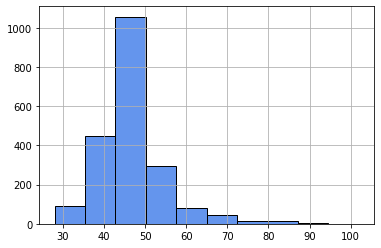

In [9]:
# для разнообразия границы столбцов здесь черные
# k – сокращение от black, там как b зарезервировано за blue

df["livesp"].hist(color = "cornflowerblue", edgecolor = "k")

In [10]:
print(df["livesp"].mean())
print(df["livesp"].median())
print(df["livesp"].mode())

46.33725490196078
45.0
0    45
dtype: int64


**Комментарий:** тут тоже распределение скошено вправо, но совсем не такая радикально, как в предыдущем случае. Медиана и мода совпадают, а вот среднее чуть-чуть повыше. 

Посмотрим также на особенности распределения расстояния до центра (`dist`):

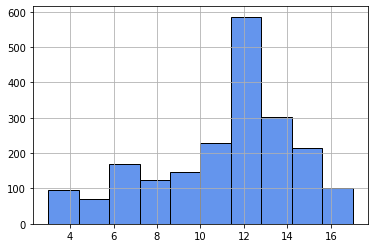

In [11]:
df["dist"].hist(color = "cornflowerblue", edgecolor = "k")

In [12]:
print(df["dist"].mean())
print(df["dist"].median())
print(df["dist"].mode())

11.015686274509823
12.0
0    12.0
dtype: float64


**Комментарий:** вот тут уже скошенность влево, опять же не очень радикальная. Видно, что «хвост» распределения слева достаточно длинный, но при этом нельзя сказать, что значения в этом «хвосте» очень редкие, высоты столбиков около 100. Среднее чуть меньше медианы, тоже сигнал о небольшой скошенности влево.

### Часть 2: доверительные интервалы

Итак, вернемся к ценам на квартиры:

In [13]:
df["price"].describe()

count    2040.000000
mean      127.496569
std        51.878220
min        50.000000
25%        95.000000
50%       115.000000
75%       142.000000
max       730.000000
Name: price, dtype: float64

Средняя цена квартиры примерно равна 127 тысячам долларов. Но, на самом деле, истинное среднее значение цены может быть немного иным, ведь далеко не все квартиры вошли в выборку, в Москве их явно не 2040!

Чтобы учесть такую неопределенность в наших оценках, построим **95%-ный доверительный интервал для среднего**. Вспомним, как он считается:

$$
\hat{\mu} - 2 \times s_{\hat{\mu}} < \mu < \hat{\mu} + 2 \times s_{\hat{\mu}}.
$$

Здесь $\mu$ – среднее генеральной совокупности, которое нам неизвестно и которое мы хотим оценить с помощью доверительного интервала, $\hat{\mu}$ – среднее, полученное по выборке, $s_{\hat{\mu}}$ – стандартное отклонение среднего, тоже полученное по выборке, которое вычисляется на основе стандартного отклонения самой выборки $s$ и ее объема $n$:

$$
s_{\hat{\mu}} = \frac{s}{\sqrt{n}}
$$


Итак, соберем все составные части для формулы:

In [14]:
n = df["price"].size  # размер выборки
mu_hat = df["price"].mean()  # среднее выборки mu^
s = df["price"].std()  # ст отклонение выборки s

Вычислим стандартное отклонение среднего:

In [15]:
s_mu_hat = s / np.sqrt(n)
s_mu_hat

1.1486030879486555

Отлично! Осталось все собрать воедино и посчитать границы доверительного интервала! Подставим все в формулу:

In [16]:
(mu_hat - 2 * s_mu_hat, mu_hat + 2 * s_mu_hat) # давайте проинтерпретируем!

(125.19936245155367, 129.7937748033483)

**Интерпретация:** c 95%-ной уверенностью мы можем утверждать, что истинное значение средней цены квартиры в Москве лежит в интервале от 125 до 130 тысяч долларов.

Тот же самый интервал мы могли бы посчитать, воспользовавшись специальной функцией из модуля `stats` библиотеки `scipy` (от *Scientific Python*). Сама функция называется `norm.interval()` позволяет строить некоторые интервалы, предполагая, что те оценки, для которых мы эти интервалы строим, берутся из нормального распределения с некоторым средним (`loc`) и некоторым стандартным отклонением (`scale`). Можем подставить наши значения `mu_hat` и `s_mu_hat` в качестве параметров такого распределения и зафиксировать уровень доверия:

In [17]:
st.norm.interval(0.95, loc = mu_hat, scale = s_mu_hat)

(125.24534794254012, 129.74778931236185)

Данный интервал чуть более точный, чем тот, который мы посчитали ранее, потому что значение, на которое мы домножаем `s_mu_hat`, на самом деле, не совсем 2, а чуть поменьше (1.96, если вспомнить курс по теории вероятностей).

### Часть 3: проверка гипотез и коэффициент корреляции Пирсона

Теперь давайте посмотрим на связи между показателями в количественной шкале. Допустим, нас интересует связь между жилой площадью квартиры и ее ценой.

Для начала построим диаграмму рассеивания:

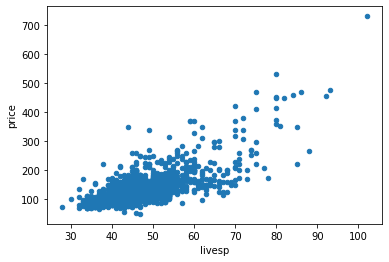

In [18]:
df.plot.scatter(x = "livesp", y = "price") # проинтерпретируем

**Интерпретация:** связь между жилой площадью и ценой квартиры прямая и достаточно сильная. Единственное, на графике есть не совсем типичное наблюдение – точка, соответствующая очень большой и дорогой квартире. Теоретически, ее наличие может искажать полученную оценку коэффициента корреляции (коэффициент Пирсона чувствителен к выбросам), но так как в данном случае точка не очень сильно отстоит от основного облака точек, искажение не будет критичным (можете проверить – отфильтровать наблюдения и сравнить коэффициенты для данных с этой точкой и без нее).

Вычислим коэффициент корреляции Пирсона и проверим его значимость – гипотезу о том, что истинное значение этого коэффициента (значение для всех генеральной совокупности, для всех квартир) равно 0:

$$
H_0:R=0 \text{ (линейной связи нет) }
$$
$$ 
H_1:R\ne0 \text{ (линейная связь есть) }
$$

In [19]:
st.pearsonr(df["livesp"], df["price"]) # проинтерпретируем!

(0.7296136021085436, 0.0)

**Интерпретация.** Коэффициент корреляции Пирсона равен 0.72 (связь прямая, близкая к сильной), оценка коэффициента значимо отличается от 0 на 5%-ном уровне значимости (и любом другом разумном уровне значимости, так как p-value примерно 0). Следовательно, связь между показателями действительно есть.